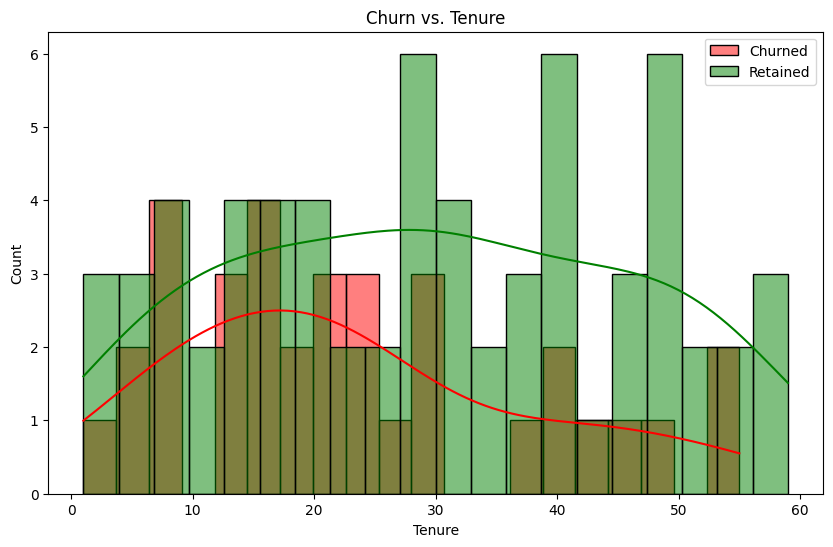

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.30      0.60      0.40         5

    accuracy                           0.55        20
   macro avg       0.55      0.57      0.52        20
weighted avg       0.68      0.55      0.58        20

Top churn indicators:
Usage                0.308162
MonthlyCharges       0.272160
Tenure               0.239466
SupportTickets       0.115876
Contract_Two Year    0.036315
Contract_One Year    0.028021
dtype: float64
- High Monthly Charges: Offer discounts or loyalty rewards.
- Month-to-Month Contracts: Encourage long-term contracts with incentives.
- Low Tenure Customers: Provide early engagement benefits.
- Frequent Support Issues: Enhance customer support experience.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = {
    'CustomerID': range(1, 101),
    'Tenure': np.random.randint(1, 60, 100),  # Months with company
    'MonthlyCharges': np.random.uniform(20, 120, 100),
    'Contract': np.random.choice(['Month-to-Month', 'One Year', 'Two Year'], 100),
    'SupportTickets': np.random.randint(0, 5, 100),
    'Usage': np.random.uniform(1, 50, 100),  # Monthly data usage
    'Churn': np.random.choice([0, 1], 100, p=[0.7, 0.3])  # 0: Retained, 1: Churned
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churn'] == 1]['Tenure'], bins=20, kde=True, color='red', label='Churned')
sns.histplot(df[df['Churn'] == 0]['Tenure'], bins=20, kde=True, color='green', label='Retained')
plt.legend()
plt.title('Churn vs. Tenure')
plt.show()

df = pd.get_dummies(df, columns=['Contract'], drop_first=True)

X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top churn indicators:")
print(feature_importances)
strategies = {
    'High Monthly Charges': "Offer discounts or loyalty rewards.",
    'Month-to-Month Contracts': "Encourage long-term contracts with incentives.",
    'Low Tenure Customers': "Provide early engagement benefits.",
    'Frequent Support Issues': "Enhance customer support experience."
}

for key, strategy in strategies.items():
    print(f"- {key}: {strategy}")
